# Evolution Strategies

First, we load necessary modules.

In [1]:
# load modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
matplotlib.rcParams['text.usetex'] = True

from ea_operators import crossover
from ea_operators import selection
from ea_utilities import objective_functions
from ea_utilities import visualize
from ea_algorithms.es import es
from ea_algorithms.ga import ga

We will reuse the test functions from *An Analysis of the Behaviour of a Class of Genetic Adaptive
Systems* by K. A. De Jong (1975).

In [2]:
def plot_test_function(test_function, a, b):
    # create a grid of x and y values
    x = np.linspace(a, b, 100)
    y = np.linspace(a, b, 100)
    X, Y = np.meshgrid(x, y)
    xy_coordinates = np.column_stack((X.ravel(), Y.ravel()))

    # calculate z values
    result = test_function(xy_coordinates)
    Z = result.reshape(X.shape)

    # create a 3D figure with two subplots
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # plot the 3D surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')

    # add labels and a color bar
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('')
    fig.colorbar(surf)

    # adjust the layout to prevent overlapping labels
    plt.tight_layout()

    # show the plot
    plt.show()

1) F1 function, also called the *spherical model*:

$$F_1(\mathbf{x}) = \sum_{i=1}^n x_i^2$$

It is continuous, convex, unimodal, quadratic,
symmetrical. So it is typically not hard to minimize.

Search is restricted to $[-5.12; 5.12]$ with step 0.01.

Minimum is of course at $\mathbf{x} = (0, \ldots, 0)^\top$
and equals $0$.

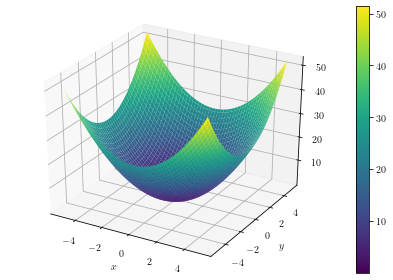

In [3]:
plot_test_function(objective_functions.F1, -5.12, 5.12)

2) F2 function (Rosenbrock function):

$$F_2(\mathbf{x}) = \sum_{i=1}^{n-1} \left(100(x_i^2 - x_{i+1})^2 + (1 - x_i)^2\right)$$

It is continuous, non-convex, unimodal, and
difficult because it has deep parabolic valleys
along the curves $x_{i+1} = x_i^2$.

Search is restricted to $[-2.048; 2.048]$ with step 0.001.

Minimum is attained at $\mathbf{x} = (1, \ldots, 1)^\top$
and equals $0$.


In [ ]:
plot_test_function(objective_functions.F2, -2.048, 2.048)

3) F3 function:

$$F_3(\mathbf{x}) = \sum_{i=1}^n [x_i]$$

Here $[\cdot]$ represents closest integer from the left (floor function).

It is discontinuous, non-convex, unimodal, and
piecewise-constant.

Search is restricted to $[-5.12; 5.12]$ with step 0.01.

Minimum is attained at $\mathbf{x} = (-5.12, \ldots, -5.12)^\top$
and equals $-6n$.

In [ ]:
plot_test_function(objective_functions.F3, -5.12, 5.12)

4) F4 function:

$$F_4(\mathbf{x}) = \sum_{i=1}^n i x_i^4 + N(0, 1)$$

(This is for $n = 30$. For other $n$, standard deviation of random
normals is chosen heuristically not to be too large.)
It is continuous, convex, unimodal, and
quartic. Most importantly, it is *stochastic*, in the sense
that on *each evaluation* it yields slightly different
results.

Search is restricted to $[-1.28; 1.28]$ with step 0.01.

Minimum (deterministic part) is of course at $\mathbf{x} = (0, \ldots, 0)^\top$
and equals $0$.

In [ ]:
plot_test_function(objective_functions.F4, -1.28, 1.28)

5) F5 function:

$$F_5(x_1, x_2) = \left(\frac{1}{500} + \sum_{j=1}^{25} \frac{1}{f_j(x_1, x_2)}\right)^{-1}\;,$$
where
$$f_j(x_1, x_2) = j + \sum_{i=1}^2 (x_i - a_{ij})^6\;,$$
where

$\mathbf{a} =  \begin{pmatrix}
-32 & -16 & 0 & 16 & 32 & -32 & -16 & \ldots & 0 & 16 & 32\\
-32 & -32 & -32 & -32 & -32 & -16 & -16 & \ldots 32 & 32 & 32
\end{pmatrix}$

It is continuous, non-convex, non-quadratic, and multimodal,
making it especially hard to optimize.

Search is restricted to $[-65.536; 65.536]$ with step 0.001.

Minimum is attained at (approximately) $(-32, -32)^\top$
and equals $1$. (Pay attention that each "column" is of different height.)


In [ ]:
plot_test_function(objective_functions.F5, -65.536, 65.536)

First let's see how a (10, 100)-ES tackles
these problems, and how to choose parameters to improve its performance.

With F1 function, everything is easy.

Compared to a genetic algorithm with tournament selection,
we see that evolution strategies are much faster, and
that they are at worst comparable, and at best superior.

In what follows, we will only focus on ES.

In [12]:
T = 5
random_seed = 123
nvar = 100  # ES works well even for very high-dimensional problems
print_iteration_number = True
mu = 10
children_count = 100
starting_point = 10*np.ones(nvar)

es_function_comma_one_sigma =\
    lambda: es(objective_function=objective_functions.F1,
               nvar=nvar,
               starting_point=starting_point,
               mu=mu, children_count=children_count,
               selection_strategy=0, many_sigmas=False,
               generations_count=2000,
               optimum_value=0, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, comma strategy, one sigma:")
visualize.report_average_ea_progress(
    es_function_comma_one_sigma, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

es_function_comma_many_sigmas =\
    lambda: es(objective_function=objective_functions.F1,
               nvar=nvar,
               starting_point=starting_point,
               mu=mu, children_count=children_count,
               selection_strategy=0, many_sigmas=True,
               generations_count=2000,
               optimum_value=0, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, comma strategy, many sigmas:")
visualize.report_average_ea_progress(
    es_function_comma_many_sigmas, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

es_function_plus_many_sigmas =\
    lambda: es(objective_function=objective_functions.F1,
               nvar=nvar,
               starting_point=starting_point,
               mu=mu, children_count=children_count,
               selection_strategy=1, many_sigmas=True,
               generations_count=2000,
               optimum_value=0, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, plus strategy, many sigmas:")
visualize.report_average_ea_progress(
    es_function_plus_many_sigmas, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

# ga_function_tournament =\
#     lambda: ga(objective_function=objective_functions.F1,
#                nvar=nvar, a=-5.12, b=5.12, bits_num=32,
#                mu=50,
#                crossover_function=crossover.crossover_one_point,
#                selection_function=(selection.selection_tournament,
#                                    {"q": 15}),
#                prob_crossover=1, prob_mutation=0.001,
#                generations_count=2000,
#                optimum_value=0, precision=1e-8,
#                suppress_output=True, do_print=False)

# print("GA, tournament selection:")
# visualize.report_average_ea_progress(
#     ga_function_tournament, T=T,
#     random_seed=random_seed,
#     print_iteration_number=print_iteration_number
# )

ES, comma strategy, one sigma:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Total number of successes: 5.0
Mean function evaluations: 22610.000
Std of function evaluations: 1048.809
Mean final generation: 227.000
Std of final generations: 10.488
Mean of best fitnesses: 0.00000001
The best fitness ever: 0.00000001

ES, comma strategy, many sigmas:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Total number of successes: 5.0
Mean function evaluations: 80190.000
Std of function evaluations: 9303.601
Mean final generation: 802.800
Std of final generations: 93.036
Mean of best fitnesses: 0.00000001
The best fitness ever: 0.00000001

ES, plus strategy, many sigmas:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Total number of successes: 5.0
Mean function evaluations: 76950.000
Std of function evaluations: 13958.080
Mean final generation: 770.400
S

Let's see how other functions are optimized.

For F2 function, we have good results, especially for
a "plus" strategy.

In [18]:
T = 10
random_seed = 123
nvar = 10
print_iteration_number = True
mu = 20
children_count = 200
starting_point = -1.2*np.ones(nvar)

es_function_comma_one_sigma =\
    lambda: es(objective_function=objective_functions.F2,
               nvar=nvar,
               starting_point=starting_point,
               mu=mu, children_count=children_count,
               selection_strategy=0, many_sigmas=False,
               generations_count=2000,
               optimum_value=0, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, comma strategy, one sigma:")
visualize.report_average_ea_progress(
    es_function_comma_one_sigma, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

es_function_comma_many_sigmas =\
    lambda: es(objective_function=objective_functions.F2,
               nvar=nvar,
               starting_point=starting_point,
               mu=mu, children_count=children_count,
               selection_strategy=0, many_sigmas=True,
               generations_count=2000,
               optimum_value=0, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, comma strategy, many sigmas:")
visualize.report_average_ea_progress(
    es_function_comma_many_sigmas, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

es_function_plus_many_sigmas =\
    lambda: es(objective_function=objective_functions.F2,
               nvar=nvar,
               starting_point=starting_point,
               mu=mu, children_count=children_count,
               selection_strategy=1, many_sigmas=True,
               generations_count=2000,
               optimum_value=0, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, plus strategy, many sigmas:")
visualize.report_average_ea_progress(
    es_function_plus_many_sigmas, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

ES, comma strategy, one sigma:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Iteration number 6
Iteration number 7
Iteration number 8
Iteration number 9
Iteration number 10
Total number of successes: 0.0
Mean function evaluations: 400020.000
Std of function evaluations: 0.000
Mean final generation: 2000.000
Std of final generations: 0.000
Mean of best fitnesses: 0.69121608
The best fitness ever: 0.57082087

ES, comma strategy, many sigmas:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Iteration number 6
Iteration number 7
Iteration number 8
Iteration number 9
Iteration number 10
Total number of successes: 0.0
Mean function evaluations: 400020.000
Std of function evaluations: 0.000
Mean final generation: 2000.000
Std of final generations: 0.000
Mean of best fitnesses: 0.00521691
The best fitness ever: 0.00460242

ES, plus strategy, many sigmas:
Iteration number 1
Iteration number 2
Iteratio

F3 function is not hard in low dimensions, but for high
dimensions (e.g., 20), ES can lack enough information to update individuals
due to large plateaus.

In [21]:
T = 5
random_seed = 123
nvar = 20
print_iteration_number = True
mu = 20
children_count = 200
starting_point = 10*np.ones(nvar)
a = -5.12
sigma_initial = 1

es_function_comma_one_sigma =\
    lambda: es(objective_function=objective_functions.F3,
               nvar=nvar, a=a,
               starting_point=starting_point,
               sigma_initial=sigma_initial,
               mu=mu, children_count=children_count,
               selection_strategy=0, many_sigmas=False,
               generations_count=2000,
               optimum_value=-6*nvar, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, comma strategy, one sigma:")
visualize.report_average_ea_progress(
    es_function_comma_one_sigma, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

es_function_comma_many_sigmas =\
    lambda: es(objective_function=objective_functions.F3,
               nvar=nvar, a=a,
               starting_point=starting_point,
               sigma_initial=sigma_initial,
               mu=mu, children_count=children_count,
               selection_strategy=0, many_sigmas=True,
               generations_count=2000,
               optimum_value=-6*nvar, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, comma strategy, many sigmas:")
visualize.report_average_ea_progress(
    es_function_comma_many_sigmas, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

es_function_plus_many_sigmas =\
    lambda: es(objective_function=objective_functions.F3,
               nvar=nvar, a=a,
               starting_point=starting_point,
               sigma_initial=sigma_initial,
               mu=mu, children_count=children_count,
               selection_strategy=1, many_sigmas=True,
               generations_count=2000,
               optimum_value=-6*nvar, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, plus strategy, many sigmas:")
visualize.report_average_ea_progress(
    es_function_plus_many_sigmas, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

ES, comma strategy, one sigma:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Total number of successes: 0.0
Mean function evaluations: 400020.000
Std of function evaluations: 0.000
Mean final generation: 2000.000
Std of final generations: 0.000
Mean of best fitnesses: -118.60000000
The best fitness ever: -119.00000000

ES, comma strategy, many sigmas:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Total number of successes: 0.0
Mean function evaluations: 400020.000
Std of function evaluations: 0.000
Mean final generation: 2000.000
Std of final generations: 0.000
Mean of best fitnesses: -108.20000000
The best fitness ever: -109.00000000

ES, plus strategy, many sigmas:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Total number of successes: 0.0
Mean function evaluations: 400020.000
Std of function evaluations: 0.000
Mean final generation: 2000

For F4, results are also very good.
Especially for $n = 30$ and other large $n$, for which the formula was originally
developed. For other $n$, I tried to draw random noise
on the same scale, but apparently I was not very successful
and sometimes I can get negative fitness values large in
absolute value. In this case, ES finds the optimum alright,
but reports these very low fitness values as "the best".

In [23]:
T = 5
random_seed = 123
nvar = 50
print_iteration_number = True
mu = 10
children_count = 100
starting_point = 10*np.ones(nvar)

es_function_comma_one_sigma =\
    lambda: es(objective_function=objective_functions.F4,
               nvar=nvar,
               starting_point=starting_point,
               sigma_initial=sigma_initial,
               mu=mu, children_count=children_count,
               selection_strategy=0, many_sigmas=False,
               generations_count=2000,
               optimum_value=0, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, comma strategy, one sigma:")
visualize.report_average_ea_progress(
    es_function_comma_one_sigma, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

es_function_comma_many_sigmas =\
    lambda: es(objective_function=objective_functions.F4,
               nvar=nvar,
               starting_point=starting_point,
               sigma_initial=sigma_initial,
               mu=mu, children_count=children_count,
               selection_strategy=0, many_sigmas=True,
               generations_count=2000,
               optimum_value=0, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, comma strategy, many sigmas:")
visualize.report_average_ea_progress(
    es_function_comma_many_sigmas, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

es_function_plus_many_sigmas =\
    lambda: es(objective_function=objective_functions.F4,
               nvar=nvar,
               starting_point=starting_point,
               sigma_initial=sigma_initial,
               mu=mu, children_count=children_count,
               selection_strategy=1, many_sigmas=True,
               generations_count=2000,
               optimum_value=0, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, plus strategy, many sigmas:")
visualize.report_average_ea_progress(
    es_function_plus_many_sigmas, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

ES, comma strategy, one sigma:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Total number of successes: 5.0
Mean function evaluations: 26430.000
Std of function evaluations: 2058.397
Mean final generation: 265.200
Std of final generations: 20.584
Mean of best fitnesses: 0.00000001
The best fitness ever: 0.00000001

ES, comma strategy, many sigmas:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Total number of successes: 5.0
Mean function evaluations: 24110.000
Std of function evaluations: 3354.102
Mean final generation: 242.000
Std of final generations: 33.541
Mean of best fitnesses: 0.00000001
The best fitness ever: 0.00000001

ES, plus strategy, many sigmas:
Iteration number 1
Iteration number 2
Iteration number 3
Iteration number 4
Iteration number 5
Total number of successes: 5.0
Mean function evaluations: 24530.000
Std of function evaluations: 1215.319
Mean final generation: 246.200
St

For F5, results are not so good, because the function
is highly multimodal.
Other ideas (island models, sharing, etc.) can be used
to enhance ES performance in this case.

In [ ]:
T = 5
random_seed = 123
nvar = 2
print_iteration_number = True
mu = 10
children_count = 100
starting_point = 0*np.ones(nvar)

es_function_comma_one_sigma =\
    lambda: es(objective_function=objective_functions.F5,
               nvar=nvar, a=-40, b=40,
               starting_point=starting_point,
               sigma_initial=sigma_initial,
               mu=mu, children_count=children_count,
               selection_strategy=0, many_sigmas=False,
               generations_count=1000,
               optimum_value=0.9980038388, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, comma strategy, one sigma:")
visualize.report_average_ea_progress(
    es_function_comma_one_sigma, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

es_function_comma_many_sigmas =\
    lambda: es(objective_function=objective_functions.F5,
               nvar=nvar, a=-40, b=40,
               starting_point=starting_point,
               sigma_initial=sigma_initial,
               mu=mu, children_count=children_count,
               selection_strategy=0, many_sigmas=True,
               generations_count=1000,
               optimum_value=0.9980038388, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, comma strategy, many sigmas:")
visualize.report_average_ea_progress(
    es_function_comma_many_sigmas, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)

es_function_plus_many_sigmas =\
    lambda: es(objective_function=objective_functions.F5,
               nvar=nvar, a=-40, b=40,
               starting_point=starting_point,
               sigma_initial=sigma_initial,
               mu=mu, children_count=children_count,
               selection_strategy=1, many_sigmas=True,
               generations_count=1000,
               optimum_value=0.9980038388, precision=1e-8,
               suppress_output=True, do_print=False)

print("ES, plus strategy, many sigmas:")
visualize.report_average_ea_progress(
    es_function_plus_many_sigmas, T=T,
    random_seed=random_seed,
    print_iteration_number=print_iteration_number
)